In [9]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

# Fonte dos dados: http://sistemas.saude.rj.gov.br/tabnetbd/dhx.exe?covid19/esus_sivep.def

In [17]:
população = 515317 # Em 2020

# Labels do eixo horizontal.
lista = []
for ano in range(2020,2023,1):
    for mes in range(1,13,1):
        if mes < 10:
            lista.append(f'{ano}/0{mes}/01')
        else:
            lista.append(f'{ano}/{mes}/01')
labels_lista = lista[3:27]

# Sobre a cidade Tanguá

In [26]:
url = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Infectados_em_Tangu%C3%A1.csv'
dados0 = pd.read_csv(url, index_col=0)

Text(0.5, 1.0, 'Infectados na cidade Tanguá.')

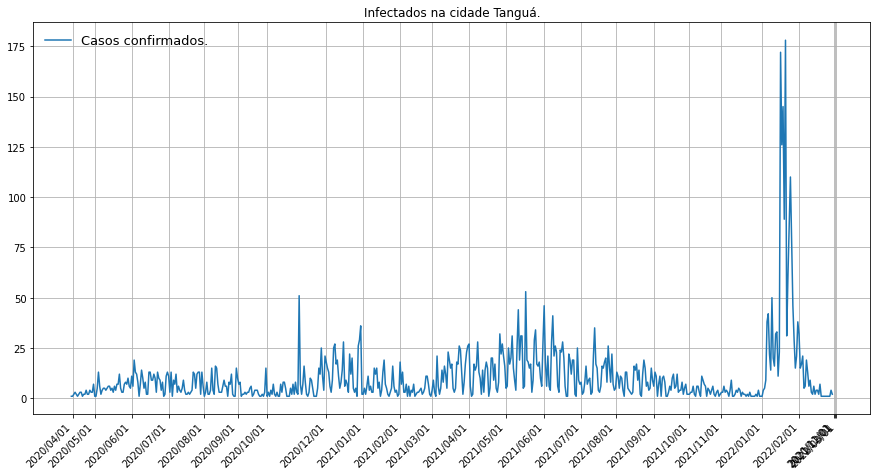

In [27]:
dados0_y_tangua = dados0['Tanguá'].to_numpy()
dados0_x_tangua = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_tangua, dados0_y_tangua, label='Casos confirmados.')
ax.grid(True)
ax.legend(frameon=False, fontsize=13)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Tanguá.')
#ax.set_ylim([0,40000])

# Sobre a cidade Rio de Janeiro

In [28]:
url = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Infectados_em_Rio_de_Janeiro(cidade).csv'
dados0 = pd.read_csv(url, index_col=0)

Text(0.5, 1.0, 'Infectados na cidade Rio de Janeiro.')

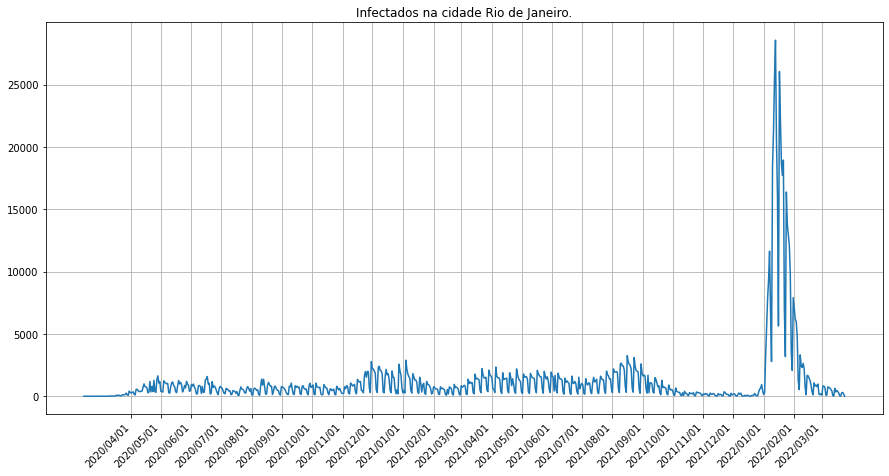

In [29]:
dados0_y_rj = dados0['Rio de Janeiro'].to_numpy()
dados0_x_rj = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_rj, dados0_y_rj)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Rio de Janeiro.')
#ax.set_ylim([0,40000])

# Sobre a cidade Niterói

In [30]:
url = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Infectados_em_Niter%C3%B3i.csv'
dados0 = pd.read_csv(url, index_col=0)

Text(0.5, 1.0, 'Infectados na cidade Niterói')

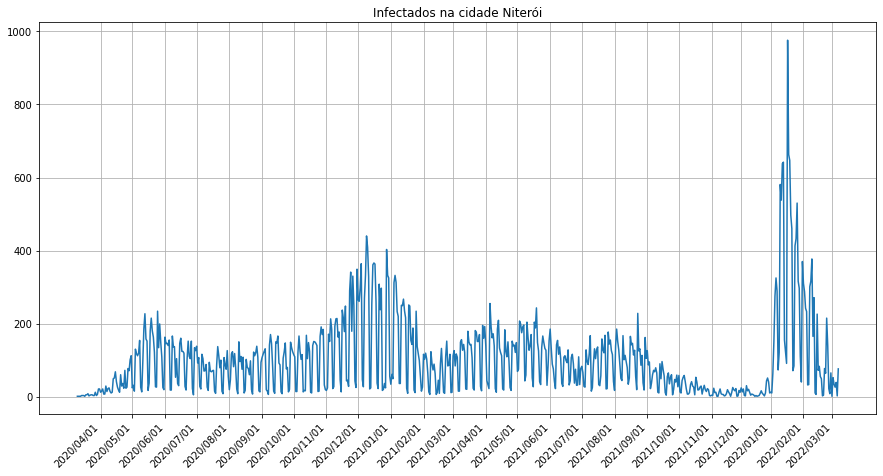

In [31]:
dados0_y_niteroi = niteroi['Casos'].to_numpy()
dados0_x_niteroi = niteroi.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_niteroi, dados0_y_niteroi)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Niterói')

# Gráfico com os dados das cidades do Rio de Janeiro, Niterói e Tanguá.

(0.0, 5000.0)

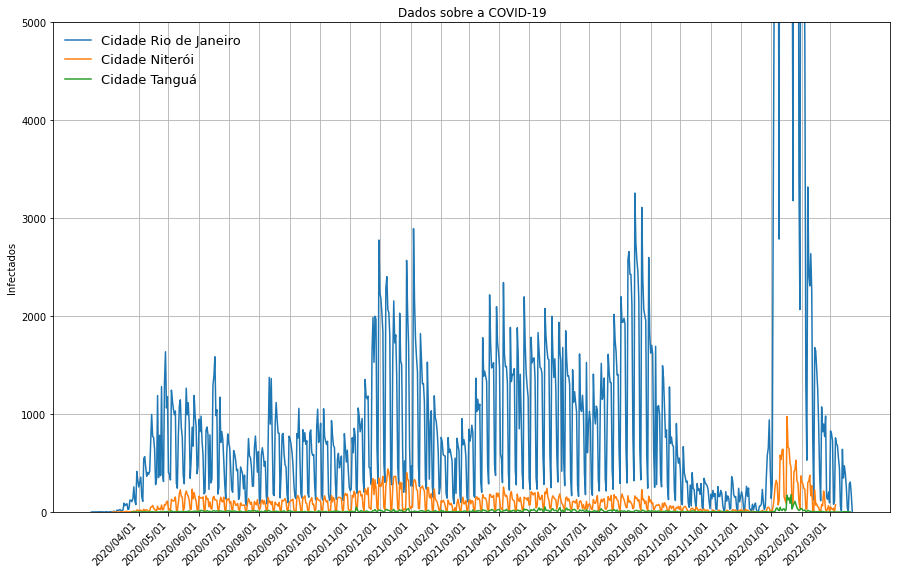

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(dados0_x_rj, dados0_y_rj, label='Cidade Rio de Janeiro')
ax.plot(dados0_x_niteroi, dados0_y_niteroi, label='Cidade Niterói')
ax.plot(dados0_x_tangua, dados0_y_tangua, label='Cidade Tanguá')
ax.grid(True)
ax.legend(frameon=False, fontsize=13)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
ax.set_title('Dados sobre a COVID-19')
ax.set_ylabel('Infectados')

ax.set_ylim([0,5000])
#ax.set_xlim(['2021/11/01','2022/03/01'])


# 